<h1>Pandas</h1>

In [ ]:
#installing pandas libraries
!pip install pandas-datareader
!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

<h2>Imports</h2>

In [2]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [3]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'])

,A,B,C
0,1,2,3
1,1,2,3


<h3>Accessing columns and rows</h3>

In [7]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df.set_index('row_label',inplace=True)
print(id(df))
df

2106322527496
2106322527496


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [10]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [11]:
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting a row by row number</h3>

In [12]:
df.iloc[0]

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [13]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [14]:
df.loc['r2','B']

'11'

In [15]:
df.loc['r2']['A']

'10'

<h3>Slicing</h3>

In [16]:
df.loc['r1':'r2']

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


In [17]:
df.loc['r1':'r2','B':'C']

,B,C
row_label,,
r1,01,02
r2,11,12


<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<table>
    <tr><td>c1</td></tr>
    <tr><td>c2</td></tr>
</table>

<h4>Example: Read the tables on the google finance page</h4>

In [18]:
df_list = pd.read_html('https://www.moneycontrol.com/markets/indian-indices/')
print(len(df_list))

7


In [22]:
df_list[3]

,Stock Name,Sector,LTP,Change,%Chg
0,Hero Motocorp,Auto - 2 & 3 Wheelers,2590.15,74.65,2.97
1,Hindalco,Iron & Steel,429.10,12.10,2.90
2,ICICI Bank,Banks - Private Sector,709.55,19.25,2.79
3,HUL,Personal Care,2325.95,61.40,2.71
4,HDFC Bank,Banks - Private Sector,1320.95,33.90,2.63
5,Coal India,Mining & Minerals,185.95,4.75,2.62
6,Kotak Mahindra,Banks - Private Sector,1829.15,45.75,2.57
7,TATA Cons. Prod,Plantations - Tea & Coffee,739.60,18.30,2.54
8,Divis Labs,Pharmaceuticals,4304.80,105.60,2.51
9,Maruti Suzuki,Auto - Cars & Jeeps,7586.60,182.05,2.46


<h4>The page contains seven tables so the read_html function returns a list of seven elements</h4>

In [23]:
df = df_list[3]
print(df)

         Stock Name                             Sector       LTP  Change  %Chg
0     Hero Motocorp              Auto - 2 & 3 Wheelers   2590.15   74.65  2.97
1          Hindalco                       Iron & Steel    429.10   12.10  2.90
2        ICICI Bank             Banks - Private Sector    709.55   19.25  2.79
3               HUL                      Personal Care   2325.95   61.40  2.71
4         HDFC Bank             Banks - Private Sector   1320.95   33.90  2.63
5        Coal India                  Mining & Minerals    185.95    4.75  2.62
6    Kotak Mahindra             Banks - Private Sector   1829.15   45.75  2.57
7   TATA Cons. Prod         Plantations - Tea & Coffee    739.60   18.30  2.54
8        Divis Labs                    Pharmaceuticals   4304.80  105.60  2.51
9     Maruti Suzuki                Auto - Cars & Jeeps   7586.60  182.05  2.46
10              M&M                Auto - Cars & Jeeps    903.80   21.25  2.41
11       Bajaj Auto              Auto - 2 & 3 Wheele

<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [24]:
df.set_index('Stock Name',inplace=True)
print(df)

                                            Sector       LTP  Change  %Chg
Stock Name                                                                
Hero Motocorp                Auto - 2 & 3 Wheelers   2590.15   74.65  2.97
Hindalco                              Iron & Steel    429.10   12.10  2.90
ICICI Bank                  Banks - Private Sector    709.55   19.25  2.79
HUL                                  Personal Care   2325.95   61.40  2.71
HDFC Bank                   Banks - Private Sector   1320.95   33.90  2.63
Coal India                       Mining & Minerals    185.95    4.75  2.62
Kotak Mahindra              Banks - Private Sector   1829.15   45.75  2.57
TATA Cons. Prod         Plantations - Tea & Coffee    739.60   18.30  2.54
Divis Labs                         Pharmaceuticals   4304.80  105.60  2.51
Maruti Suzuki                  Auto - Cars & Jeeps   7586.60  182.05  2.46
M&M                            Auto - Cars & Jeeps    903.80   21.25  2.41
Bajaj Auto               

<h4>Now we can use .loc to extract specific currency rates</h4>

In [25]:
df.loc['Infosys','LTP']

1455.15

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [26]:
infy_chng = df.loc['Infosys']['Change'] #This is chained indexing, 28
df.loc['Infosys']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(infy_chng)
print(df.loc['Infosys']['Change']) #Neither itc_chng, nor the dataframe are changed

28.0
28.0


C:\Users\arjun\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [27]:
infy_chng = df.loc['Infosys','Change'] #eur_usd points to the value inside the dataframe, 28
df.loc['Infosys','Change'] = 1.0 #Change the value in the view 
print(infy_chng) #eur_usd is changed (because it points to the view)
print(df.loc['Infosys']['Change']) #The dataframe has been correctly updated

28.0
1.0


In [28]:
df

,Sector,LTP,Change,%Chg
Stock Name,,,,
Hero Motocorp,Auto - 2 & 3 Wheelers,2590.15,74.65,2.97
Hindalco,Iron & Steel,429.10,12.10,2.90
ICICI Bank,Banks - Private Sector,709.55,19.25,2.79
HUL,Personal Care,2325.95,61.40,2.71
HDFC Bank,Banks - Private Sector,1320.95,33.90,2.63
Coal India,Mining & Minerals,185.95,4.75,2.62
Kotak Mahindra,Banks - Private Sector,1829.15,45.75,2.57
TATA Cons. Prod,Plantations - Tea & Coffee,739.60,18.30,2.54
Divis Labs,Pharmaceuticals,4304.80,105.60,2.51


<h2>Getting historical stock prices from Google financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Yahoo finance datareader has stopped working because of a change to Yahoo's website


In [29]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2021, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('IBM', 'yahoo', start, end)


2021-01-01 00:00:00 2022-05-20 19:39:48.681920


RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/IBM/history?period1=1609453800&period2=1653085799&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [30]:
start = pd.to_datetime(['2021-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-05-20']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'IBM' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)

C:\Users\arjun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
C:\Users\arjun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [31]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,120.315491,120.382408,117.629066,118.489487,110.134743,5417443
1,2021-01-05,119.512428,121.108986,119.130020,120.592735,112.089691,6395872
2,2021-01-06,121.319313,126.080307,121.147224,123.604210,114.888817,8322708
3,2021-01-07,124.321220,124.722755,122.619499,123.317398,114.622231,4714740
4,2021-01-08,122.915871,123.632889,121.395790,122.877632,114.213478,4891305
...,...,...,...,...,...,...,...
343,2022-05-13,133.000000,133.800003,131.050003,133.600006,133.600006,4195100
344,2022-05-16,133.100006,136.509995,132.410004,135.029999,135.029999,4250400
345,2022-05-17,137.190002,138.369995,135.639999,138.369995,138.369995,4372900
346,2022-05-18,137.100006,137.619995,132.169998,132.940002,132.940002,6003000


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [32]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,UP
0,2021-01-04,120.315491,120.382408,117.629066,118.489487,110.134743,5417443,0
1,2021-01-05,119.512428,121.108986,119.130020,120.592735,112.089691,6395872,1
2,2021-01-06,121.319313,126.080307,121.147224,123.604210,114.888817,8322708,1
3,2021-01-07,124.321220,124.722755,122.619499,123.317398,114.622231,4714740,0
4,2021-01-08,122.915871,123.632889,121.395790,122.877632,114.213478,4891305,0
...,...,...,...,...,...,...,...,...
343,2022-05-13,133.000000,133.800003,131.050003,133.600006,133.600006,4195100,1
344,2022-05-16,133.100006,136.509995,132.410004,135.029999,135.029999,4250400,1
345,2022-05-17,137.190002,138.369995,135.639999,138.369995,138.369995,4372900,1
346,2022-05-18,137.100006,137.619995,132.169998,132.940002,132.940002,6003000,0


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [33]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,UP
count,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02,348.000000
mean,129.523837,130.709386,128.397906,129.559550,124.754477,5.548723e+06,0.494253
std,7.651245,7.644030,7.605654,7.648332,8.049906,3.439112e+06,0.500687
min,113.288719,114.282982,112.198853,113.365204,105.371773,1.997965e+06,0.000000
25%,123.456020,124.702726,122.177544,123.559431,118.568851,3.922816e+06,0.000000
50%,131.142448,132.563049,129.800934,131.258178,127.488544,4.867774e+06,0.000000
75%,135.669739,137.093689,134.701245,135.737110,130.937591,6.112588e+06,1.000000
max,144.808792,146.118546,143.757172,144.627151,138.369995,3.981442e+07,1.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [34]:
df['UP'].sum()/df['UP'].count()

0.4942528735632184

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [35]:
df['Close'].pct_change() #One timeperiod percent change

0           NaN
1      0.017751
2      0.024972
3     -0.002320
4     -0.003566
         ...   
343    0.005267
344    0.010704
345    0.024735
346   -0.039243
347   -0.024673
Name: Close, Length: 348, dtype: float64

In [38]:
pd.set_option('display.max_rows', 400)

In [39]:
n=15
df['Close'].pct_change(n) #n timeperiods percent change

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15    -0.011699
16    -0.029095
17    -0.071235
18    -0.076595
19    -0.062164
20    -0.071084
21    -0.078090
22    -0.046486
23    -0.055672
24    -0.037230
25    -0.053635
26    -0.060271
27    -0.081580
28     0.018464
29     0.012565
30    -0.020573
31    -0.014208
32    -0.009077
33     0.014692
34     0.001410
35     0.031564
36     0.028123
37    -0.017270
38    -0.008621
39    -0.026535
40     0.002129
41    -0.017425
42     0.015880
43     0.033195
44     0.034230
45     0.065850
46     0.053094
47     0.072443
48     0.063876
49     0.062381
50     0.047236
51     0.061974
52     0.083831
53     0.081249
54     0.084185
55     0.067506
56     0.107901
57     0.110315
58     0.088535
59     0.084877
60     0.042152
61     0.047900
62     0

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [40]:
n=15
df['Close'].pct_change(n).mean()

0.005730258936076706

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [41]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0,method=single]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [42]:
n=15
df['Close'].pct_change(n).rolling(21).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35    -0.033333
36    -0.031437
37    -0.030874
38    -0.027892
39    -0.025508
40    -0.022447
41    -0.019892
42    -0.015417
43    -0.011623
44    -0.007342
45    -0.002433
46     0.002649
47     0.008969
48     0.015896
49     0.017987
50     0.019638
51     0.023569
52     0.028237
53     0.032538
54     0.035848
55     0.038995
56     0.042630
57     0.046544
58     0.051582
59     0.056035
60     0.059305
61     0.061485
62     0

<h4>Calculate several moving averages and graph them</h4>

In [43]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

In [44]:
m10 = df['Close'].rolling(window=5).mean()
m10

0             NaN
1             NaN
2             NaN
3             NaN
4      121.776292
5      122.663481
6      123.250479
7      122.797323
8      122.793500
9      122.766731
10     122.850861
11     123.017209
12     123.921607
13     121.940727
14     120.065010
15     118.816445
16     117.361377
17     115.149139
18     115.244742
19     115.619502
20     115.036328
21     114.395793
22     114.575526
23     115.087955
24     115.674953
25     116.183557
26     116.780115
27     116.759082
28     116.569789
29     115.892925
30     115.485660
31     115.196941
32     114.829828
33     114.841300
34     114.963671
35     115.583173
36     115.915869
37     115.904396
38     115.881451
39     115.808794
40     115.646269
41     115.195027
42     115.940726
43     116.718929
44     117.455066
45     118.508603
46     119.852771
47     120.766728
48     121.487570
49     122.263861
50     122.485660
51     123.043977
52     123.290632
53     123.667305
54     124.091780
55     124

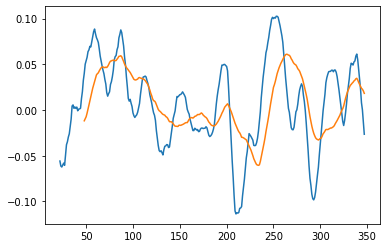

In [45]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SCTY are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [ ]:
start = pd.to_datetime(['2021-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-05-20']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'FSLR' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df_FSLR = pd.read_csv(url)

In [ ]:
start = pd.to_datetime(['2021-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-05-20']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'TAN' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df_TAN = pd.read_csv(url)

In [ ]:
start = pd.to_datetime(['2021-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-05-20']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'TSLA' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df_TSLA = pd.read_csv(url)

In [ ]:
start = pd.to_datetime(['2021-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-05-20']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'SCTY' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df_SCTY = pd.read_csv(url)

In [ ]:
df_FSLR.rename(columns = {'Close':'FSLR'}, inplace = True)
df_TAN.rename(columns = {'Close':'TAN'}, inplace = True)
df_TSLA.rename(columns = {'Close':'TSLA'}, inplace = True)
df_SCTY.rename(columns = {'Close':'SCTY'}, inplace = True)
#inter1 = pd.merge(df_FSLR, df_TAN, on = 'Date', how = 'inner')

In [ ]:
inter1 = pd.merge(df_FSLR, df_TAN, on = 'Date', how = 'inner')[['Date','FSLR','TAN']]
inter2 = pd.merge(df_TSLA, df_SCTY, on = 'Date', how = 'inner')[['Date','TSLA','SCTY']]
solar_df = pd.merge(inter1, inter2, on = 'Date', how = 'inner')[['Date','FSLR','TAN','TSLA','SCTY']]

In [ ]:
solar_df.set_index('Date', inplace = True)

In [ ]:
solar_df

In [ ]:
import datetime
import pandas_datareader as data
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,6,1)
solar_df = data.DataReader(['FSLR', 'TAN','TSLA','SCTY'],'google', start=start,end=end)['Close']

In [ ]:
solar_df

<h4>Let's calculate returns (the 1 day percent change)</h4>

In [ ]:
rets = solar_df.pct_change()
print(rets)

<h4>Let's visualize the relationship between each stock and the ETF</h4>

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

In [ ]:
plt.scatter(rets.TSLA,rets.TAN)

In [ ]:
plt.scatter(rets.SCTY,rets.TAN)

<h4>The correlation matrix</h4>

In [ ]:
solar_corr = rets.corr()
print(solar_corr)

<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

In [ ]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [ ]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','TSLA','SCTY']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

<h4>Finally plot the fitted line with the actual y values

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)